<a href="https://colab.research.google.com/github/AJinkyaBhambre/DeepLearning/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import Sequential, regularizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [3]:
train_df = pd.read_csv('/content/train.csv.zip')
test_df = pd.read_csv('/content/test.csv.zip')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('train_df shape :',train_df.shape)
print('test_df shape :',test_df.shape)

train_df shape : (42000, 785)
test_df shape : (28000, 784)


In [7]:
#checking for null values for train
train_df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [8]:
#checking for null values for test
test_df.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [9]:
#checking for duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())


0
0


In [10]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [11]:
train_df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


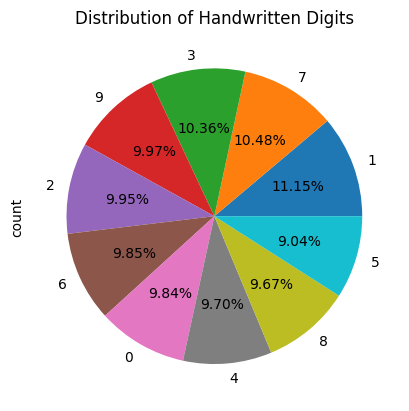

In [12]:
train_df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Handwritten Digits')
plt.show()

<ipython-input-13-af7969721a9d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_df, x='label', palette='viridis')


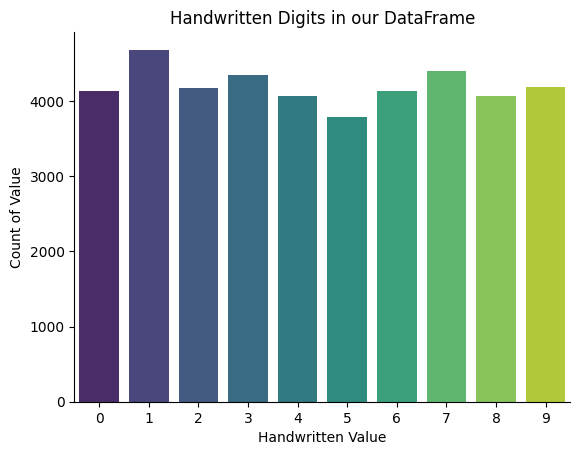

In [13]:
# Create a DataFrame for the labels
labels_df = pd.DataFrame(train_df, columns=['label'])

# Plot the distribution of digits
sns.countplot(data=labels_df, x='label', palette='viridis')
plt.xlabel("Handwritten Value")
plt.ylabel("Count of Value")
plt.title("Handwritten Digits in our DataFrame")
sns.despine()

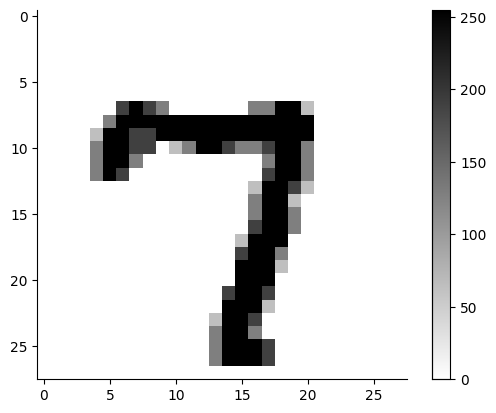

In [14]:
digit = train_df.iloc[29, 1:]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()

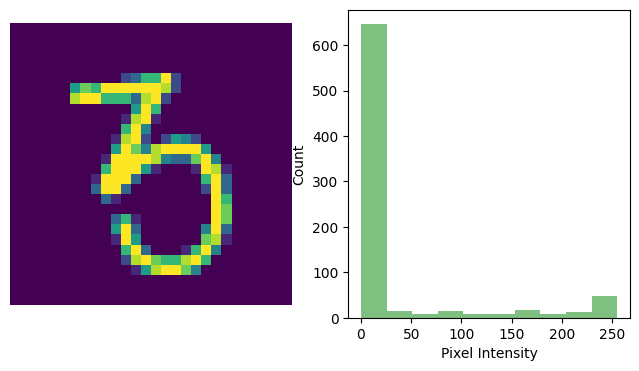

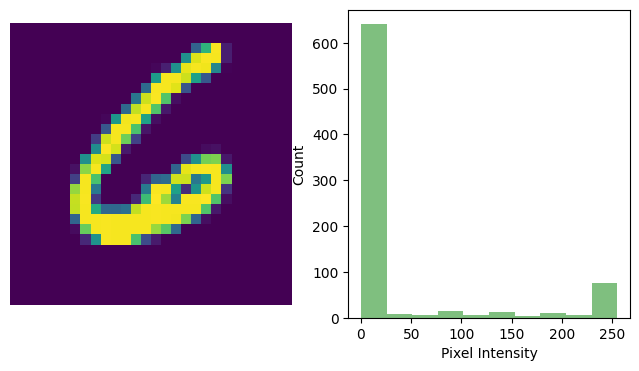

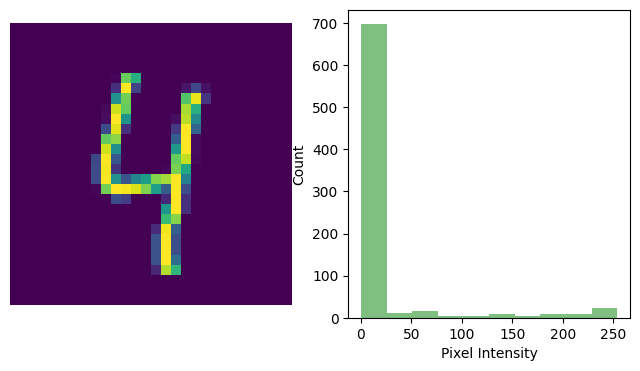

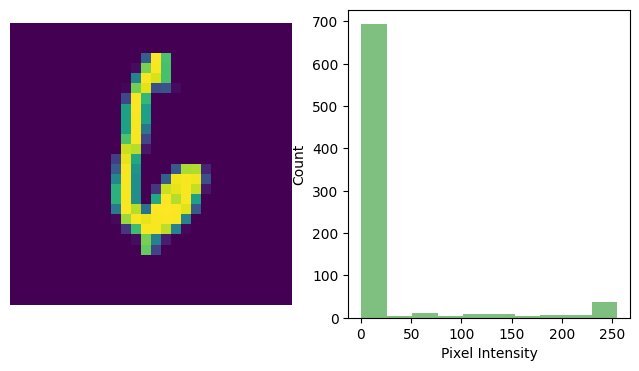

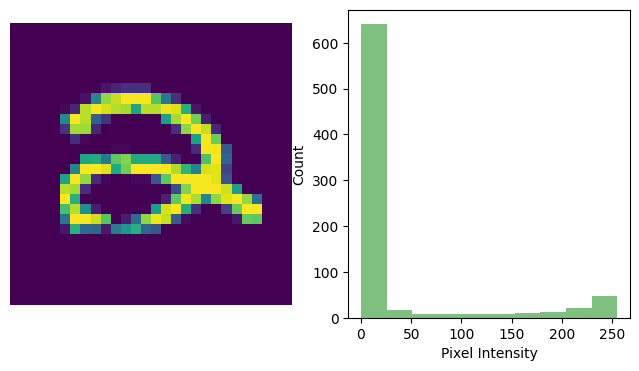

In [15]:

#displaying images and plotting pixel int
def plotHist(img):
  img = train_df.iloc[img, 1:].values.reshape(28,28)
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='viridis')
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, color='green', alpha=0.5)

for i in range(90,95):
  plotHist(i)

In [16]:
# Separate features and labels

X = train_df.iloc[:,1:]
y = train_df['label']


#converting to numpy arrays
X = X.values
y = y.values


In [17]:
# Normalize pixel values to range [0, 1]
X = X / 255
test_df = test_df/255.0

# Reshape into 4D tensor (number of samples, height, width, channels)
X = X.reshape(-1, 28, 28, 1)

In [18]:
#one hot encoding y
from keras.utils import to_categorical
y = y.ravel()
y = to_categorical(y, 10)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))),
model.add(MaxPooling2D(pool_size=(2, 2))),

model.add(Conv2D(64, (3, 3), activation='relu')),
model.add(MaxPooling2D(pool_size=(2, 2))),

model.add(Flatten()),

model.add(Dense(128, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    verbose=1
)

Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7890 - loss: 0.6689 - val_accuracy: 0.9750 - val_loss: 0.0823
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9664 - loss: 0.1166 - val_accuracy: 0.9825 - val_loss: 0.0571
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9749 - loss: 0.0812 - val_accuracy: 0.9848 - val_loss: 0.0527
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9794 - loss: 0.0658 - val_accuracy: 0.9882 - val_loss: 0.0387
Epoch 5/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9832 - loss: 0.0551 - val_accuracy: 0.9879 - val_loss: 0.0398
Epoch 6/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9833 - loss: 0.0488 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 7/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9881 - loss: 0.0373 - val_accuracy: 0.9893 - val_loss: 0.0329
Epoch 8/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.

In [24]:
loss,accuracy = model.evaluate(X_train,y_train)
print(f"The model accuracy is : {accuracy} \nThe model loss : {loss}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9992 - loss: 0.0035
The model accuracy is : 0.9991964101791382 
The model loss : 0.00358551274985075


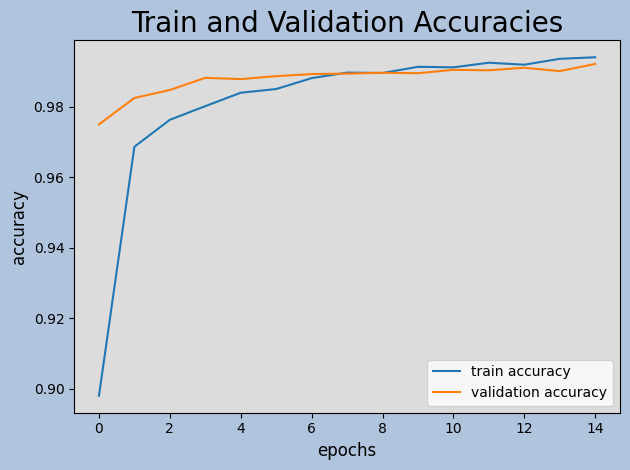

In [25]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

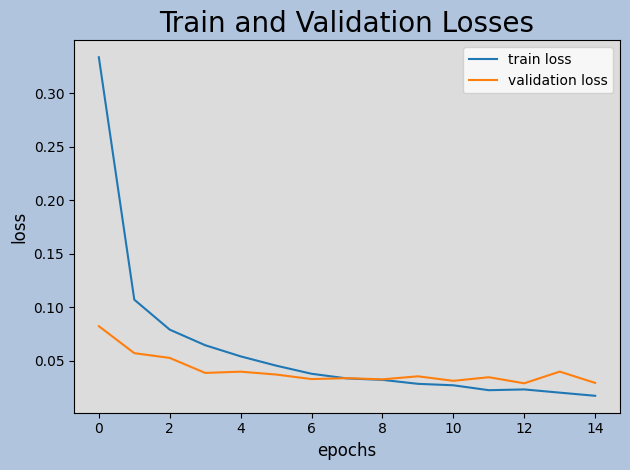

In [26]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')


In [27]:
# Predict the class probabilities for the test dataset
predictions = model.predict(X_val)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded to class indices
predicted_labels = np.argmax(predictions, axis=1)  # Already converting probabilities to class indices
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

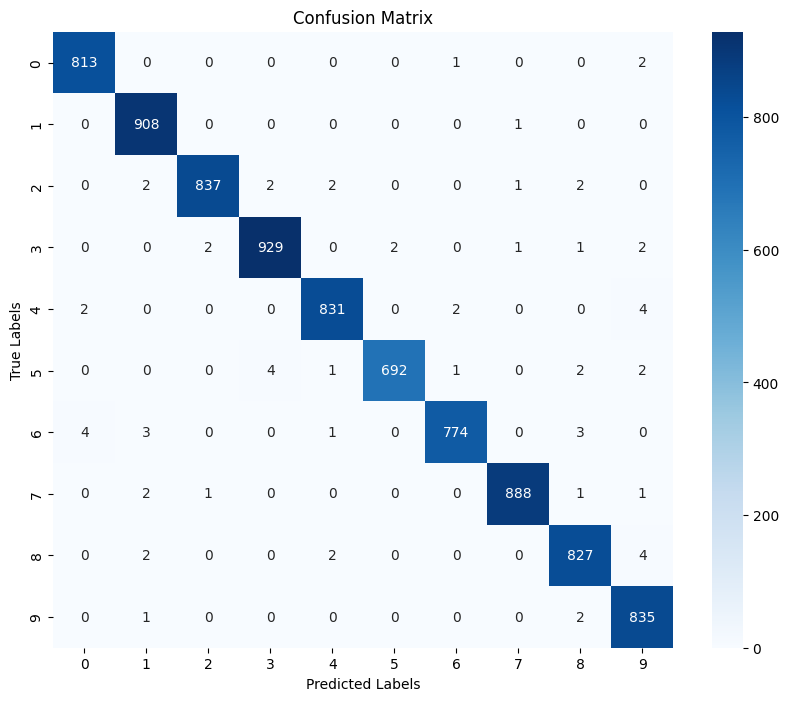

In [29]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [30]:
# Save the model
model.save("MNIST_Classification.keras")

In [31]:
# Save weights
model.save_weights('model.weights.h5')

In [32]:
# Convert Test data to NumPy array
test_X = test_df.to_numpy()

# Reshape X to 4D for CNN
test_X = test_X.reshape(-1, 28, 28, 1)  # reshaping 28x28 grayscale images

In [33]:
test_X.shape


(28000, 28, 28, 1)

In [34]:

# Predict the labels for the test data
predictions = model.predict(test_X)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [35]:
predicted_labels = np.argmax(predictions, axis=1)

In [36]:

print(predicted_labels)

[2 0 9 ... 3 9 2]


In [37]:
predicted_labels.shape

(28000,)

In [38]:
submission =  pd.DataFrame({
        "ImageId": test_df.index+1,
        "Label":predicted_labels
    })

In [39]:
submission['Label'].value_counts()

,count
Label,
1,3206
7,2900
9,2808
2,2797
3,2794
0,2781
4,2756
8,2756
6,2707


In [40]:
submission.to_csv('MNIST_submission.csv', index=False)